# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [52]:
# Import your libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [53]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [54]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [55]:
# 1 - What does each column mean?
# Channel - Canal de venta
# Region  - Región
# Fresh   - Frutas y Verduras
# Milk    - Lacteos
# Grocery - Abarrotes
# Frozen  - Congelados
# Detergents_Paper - Detergentes y Papel 
# Delicassen - Alimentos Gourmet

In [56]:
# 2 - Any Categorical data to convert? - Channel and Region
customers.Channel = customers.Channel.astype('category')
customers.Region = customers.Region.astype('category')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [57]:
# 3 - Any missing value to remove?
customers.isna().sum().sum()

0

In [58]:
# Your comment here
def heat_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,5))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax, data=corr, annot=True, cmap='Pastel1_r', mask=mask)
    plt.show()

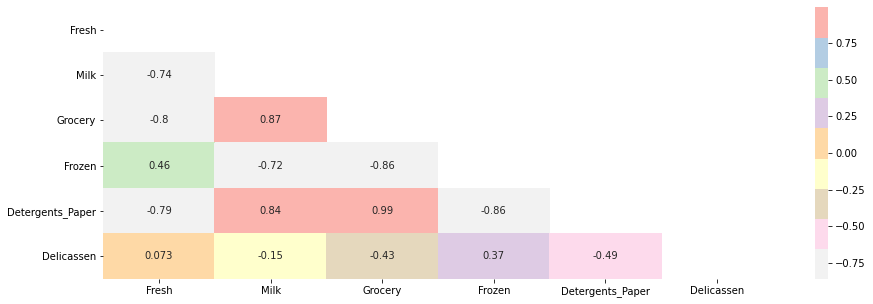

In [59]:
# 4 - Column collinearity - any high correlations?
corr = customers.corr()
heat_map(corr)

In [60]:
# indentificamos si hay columnas con una correlación mayor al 95%
high_corr_var = np.where(corr.abs()>0.95)
high_corr_var = [(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[]

In [61]:
# eliminamos outlier utilizando la función de puntuación z de scipy
import scipy.stats as stats
abs_z_score = abs(stats.zscore(customers))
filter_obs = (abs_z_score < 3).all(axis=1)
df = customers[filter_obs]
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<AxesSubplot:>

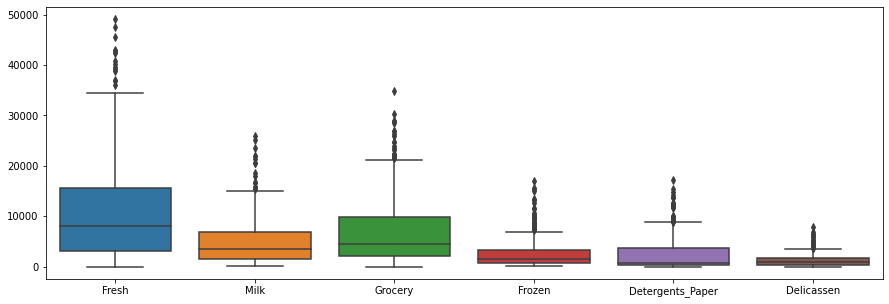

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(ax=ax, data=df)

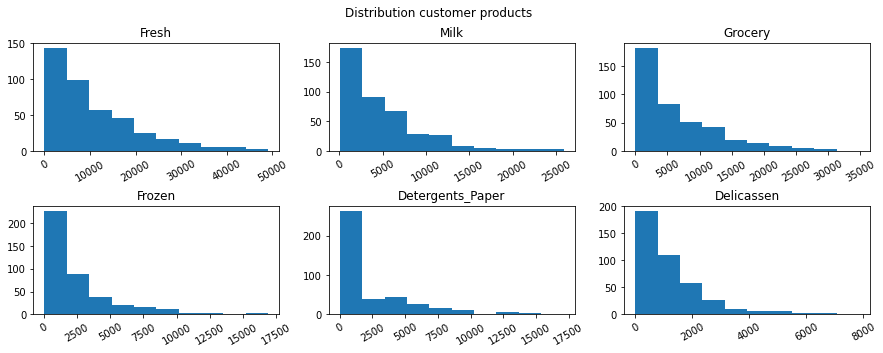

In [63]:
# 6 - Column-wise data distribution - is the distribution skewed?
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Distribution customer products')

cols_to_plot=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for col, ax in zip(cols_to_plot, axes.flatten()):
    ax.hist(df[col])
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=30)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers), columns=customers.columns)
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [65]:
from sklearn.cluster import KMeans

In [66]:
cols = [c for c in customers_scale.columns.values if c not in ['Channel','Region']]

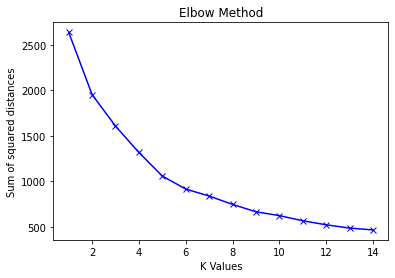

In [67]:
#Elbow Method/ Método de codo nos funciona apra identificar número adecuado de posibles clúster
K = range(1,15)
sum_of_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(customers_scale[cols])
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()

In [68]:
# la curva es muy suave por lo que no se identifica un punto de inflexión directo, el punto 6 parece ser buena opción.

In [69]:
# Hacemos la clusterización con K-Means
kmeans = KMeans(n_clusters=4,random_state=111)
census_clusters = kmeans.fit(customers_scale[cols])
preds = census_clusters.fit_predict(customers_scale[cols])
customers_scale['labels'] = preds
customers_scale.labels.unique()

array([0, 3, 2, 1])

Count the values in `labels`.

In [70]:
# Your code here:
customers_scale.labels.value_counts()

0    324
3     73
2     42
1      1
Name: labels, dtype: int64

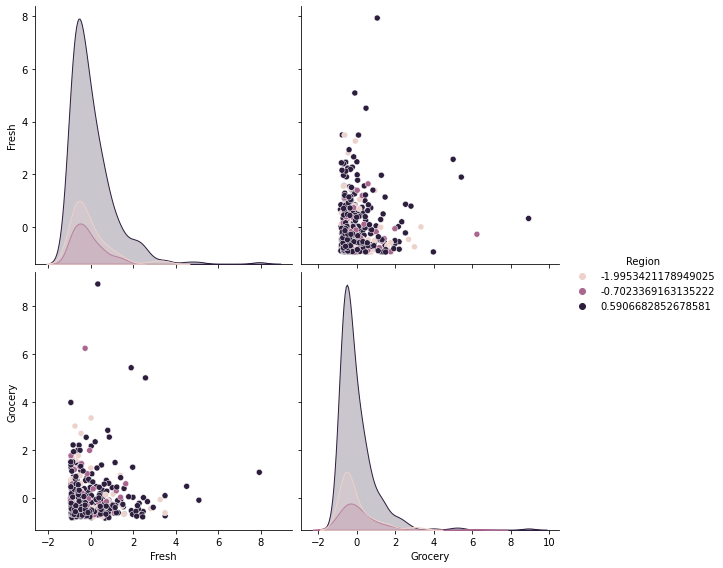

In [71]:
sns.pairplot(customers_scale, vars=['Fresh','Grocery'], hue='Region', height=4, kind= 'scatter');

In [72]:
new_df = customers_scale[['Region','Fresh','Grocery']]
cols_2 = ['Fresh','Grocery']
kmeans_2 = kmeans.fit(new_df[cols_2])

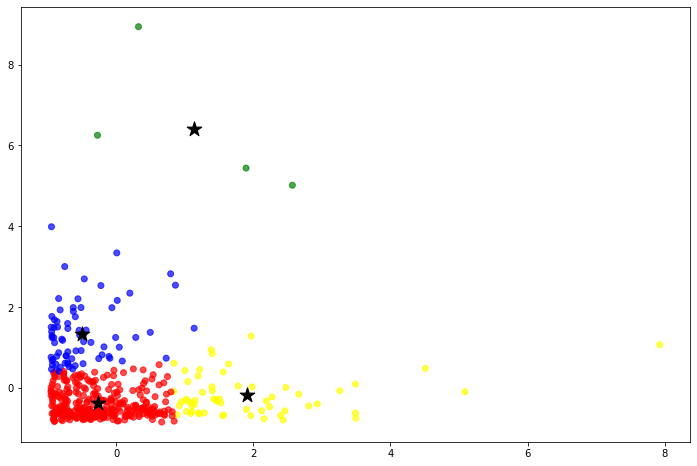

In [73]:
X = new_df[cols_2].to_numpy()
labels = kmeans_2.predict(X)
center = kmeans_2.cluster_centers_
colors = ["yellow","red","blue","green"]
asignar=[]
for row in labels:
  asignar.append(colors[row])

plt.figure(figsize=(12,8))
feature_1 = X[:,0]
feature_2 = X[:,1]
plt.scatter(feature_1, feature_2, c=asignar, alpha=.7)
plt.scatter(center[:,0], center[:,1],marker = "*",c='black',s=240)
plt.show;

In [74]:
# Agregamos las etiquetas de K-Means al dataset de trabajo
new_df['labels'] = labels
customers_scale['labels'] = labels

<ipython-input-74-d91109b53673>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['labels'] = labels


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [75]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

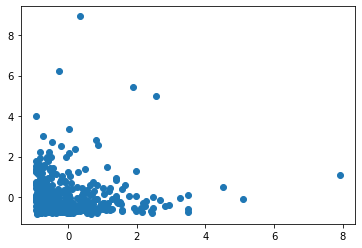

In [76]:

plt.scatter(X[:,0],X[:,1])

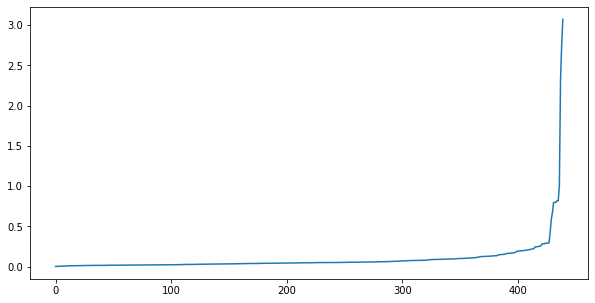

In [77]:
# identificamos el numero de
nearest_neighbors = NearestNeighbors(n_neighbors = 5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances= np.sort(distances, axis=0)[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.show()

In [78]:
# Your code here
dbs_model = DBSCAN(eps=0.5, min_samples=4)
dbs_model.fit(customers_scale)

DBSCAN(min_samples=4)

Count the values in `labels_DBSCAN`.

In [93]:
# Your code here
labels2 = dbs_model.labels_
labels2

array([ 7, -1, -1,  2, -1,  7,  0,  1,  2, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1,  2, -1,  2, -1, -1, -1,  0,  2,  2, -1,  3, -1,  2,  2, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
        2, -1, -1,  4,  2, -1, -1,  2, -1,  0, -1, -1, -1,  2, -1, -1, -1,
       -1,  2, -1, -1, -1, -1,  1,  2, -1, -1,  2,  2,  2, -1, -1,  2,  0,
       -1, -1, -1,  2, -1,  2,  2, -1, -1, -1,  2, -1,  2,  2,  2, -1, -1,
        1, -1,  2,  2,  1, -1, -1, -1,  2, -1, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, -1, -1, -1,  2, -1, -1,  3,  2,  2,  2,  2,  2,  2,
       -1, -1, -1,  2, -1, -1, -1,  2,  2, -1,  2,  2,  2,  4,  2,  2,  2,
       -1,  2, -1, -1,  2,  1, -1, -1,  2,  2, -1, -1, -1, -1,  2,  2,  2,
       -1, -1,  2, -1,  2,  1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  2,
       -1, -1, -1, -1,  2,  2, -1,  2, -1, -1, -1, -1,  5, -1, -1, -1,  5,
        5, -1,  5, -1, -1, -1,  5, -1,  5, -1, -1, -1, -1,  5, -1,  5,  5,
       -1,  6, -1,  5,  5

In [80]:
# Agregamos las etiquetas de K-Means y DBScan al dataset de trabajo
new_df['labels2'] = labels2
customers_scale['labels2'] = labels2
new_df.labels2.unique()

<ipython-input-80-f4bd908d4fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['labels2'] = labels


array([1, 0, 2, 3])

In [81]:
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0,1,len(unique_labels)))

In [82]:
labels_mask_general = np.zeros_like(labels,dtype=bool)
labels_mask_general[dbs_model.core_sample_indices_]= True

In [83]:
n_clusters_ = len (set(labels))- (1 if -1 in labels else 0 )
n_clusters_

4

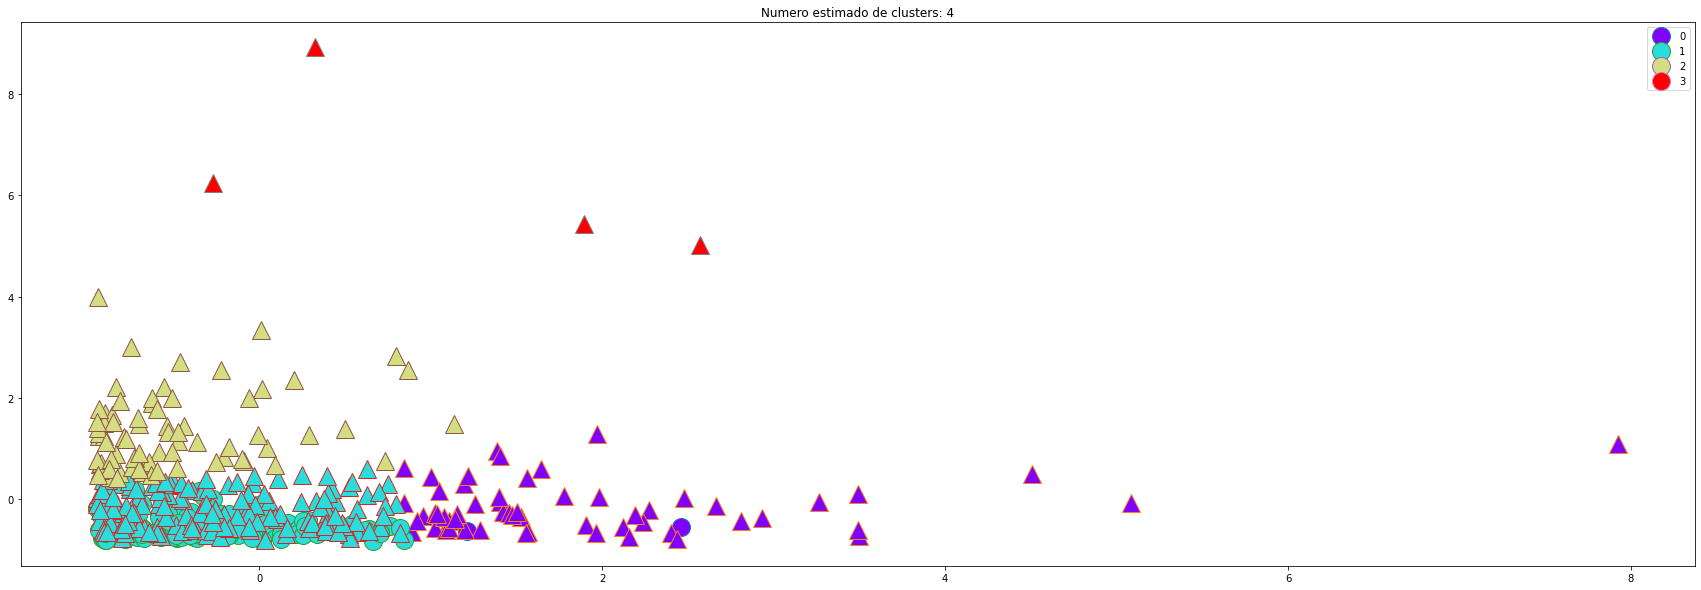

In [84]:
# Visualizacion distancia .15
plt.figure(figsize=(30,10))
for k, col in zip(unique_labels, colors):
  if k==-1:
    col = "k"

  clase = (labels ==k)  
  # Es para lo que NO es ruido
  xy = X[clase & labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=col, markersize = 18, label=k, alpha =1)
    # Es para lo que SI es ruido
  xy = X[clase & ~labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"^", markerfacecolor=col, markersize = 18, alpha =1)

plt.title("Numero estimado de clusters: %d" %n_clusters_)
plt.legend()
plt.show()

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [85]:
def scatt_plot(col1, col2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.2)
    fig.suptitle(col1 +' and '+ col2)
    axes[0].set_title('K-Mean')
    axes[1].set_title('DBScan')
    sns.scatterplot(ax=axes[0], data=customers_scale, x=col1, y=col2, hue='labels')
    sns.scatterplot(ax=axes[1], data=customers_scale, x=col1, y=col2, hue='labels2')

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

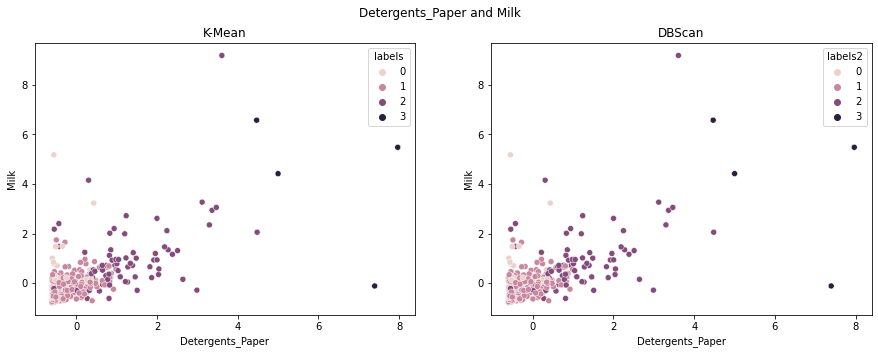

In [86]:
scatt_plot('Detergents_Paper', 'Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

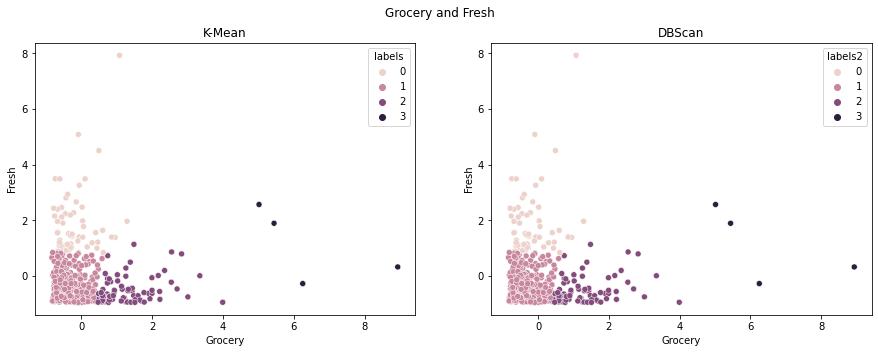

In [87]:
scatt_plot('Grocery', 'Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

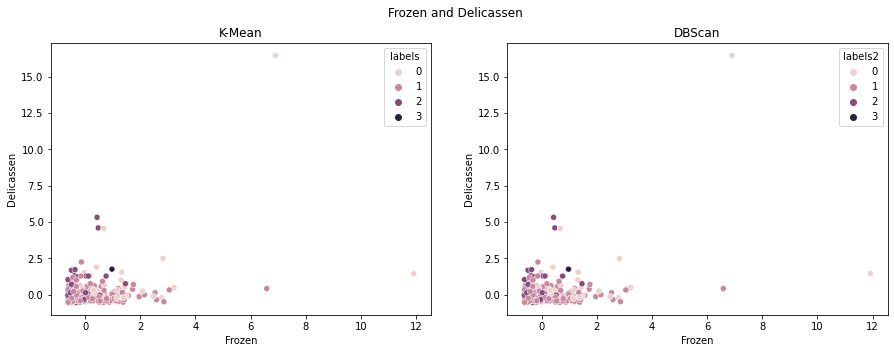

In [88]:
scatt_plot('Frozen', 'Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [91]:
# Your code here:
customers_scale.groupby(['labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels2
labels,,,,,,,,,
0,-0.400270,0.064700,1.913708,0.039343,-0.176501,0.734610,-0.384261,0.544153,0
1,-0.238506,0.001775,-0.264653,-0.310869,-0.375250,-0.076063,-0.317067,-0.162382,1
2,1.217414,-0.073307,-0.503213,1.020409,1.330653,-0.273993,1.269024,0.199657,2
3,1.448652,0.267417,1.129760,4.090483,6.411523,-0.004884,6.208750,0.580560,3


In [92]:
customers_scale.groupby(['labels2']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels2,,,,,,,,,
0,-0.400270,0.064700,1.913708,0.039343,-0.176501,0.734610,-0.384261,0.544153,0
1,-0.238506,0.001775,-0.264653,-0.310869,-0.375250,-0.076063,-0.317067,-0.162382,1
2,1.217414,-0.073307,-0.503213,1.020409,1.330653,-0.273993,1.269024,0.199657,2
3,1.448652,0.267417,1.129760,4.090483,6.411523,-0.004884,6.208750,0.580560,3


Which algorithm appears to perform better?

In [ ]:
# Your observations here
# creo que el Kmeans ya que el dbscan genera cluster vacios aunque los que estan clasificados son similires

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here